In [1]:
# Load Dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
import datetime
now = datetime.datetime.now()
from api_keys import api_key
from citipy import citipy

output_data_file = "./Resources/cities.csv"

LatRange = (-90, 90)
LngRange = (-180, 180)


In [2]:
# Definition of Lat and Long
LatLngs = []
cities = []

# Random Lat & Long 
Lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
Lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
LatLngs = zip(Lats, Lngs)

# Neraby Cities based in Lat & Long 
for Lat_Lng in LatLngs:
    city = citipy.nearest_city(Lat_Lng[0], Lat_Lng[1]).city_name
    
    # Si la ciudad es unica, la agrega al listado de ciudades
    if city not in cities:
        cities.append(city)

# Print Cities 
len(cities)

649

In [3]:
# API Conf
settings = {"units": "imperial", "appid": api_key}

# API Parameters 
params = ['name','clouds.all','sys.country','dt','main.humidity','main.temp','wind.speed']

# API Set
WeatherDf =pd.DataFrame(columns = ["City","Cloudiness", "Country", "Date", 
                                      "Humidity", "Lat","Lng", "Max Temp", 
                                      "Wind Speed"])

In [4]:
count = 1
error = 0 
sets = 0
index = 0

# Print legend at beginning
print("Beginning Data Retrieval    ")
print("----------------------------")

# Time of blocks
ts =time.time()

for city in cities:
    try:
        # Se re-emplazan los caracteres especiales.
        cityfix = city.replace(" ", "%20") 
        print(f'Processing Record {count} of Set {sets} | {cityfix}' )
        # print(f'{owm.BASE_URL}weather?q={cityfix}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(cityfix, **settings)
        WeatherDf.set_value(index, "City", city_stats["name"])
        WeatherDf.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherDf.set_value(index, "Country", city_stats("sys.country"))
        WeatherDf.set_value(index, "Date", city_stats("dt"))
        WeatherDf.set_value(index, "Humidity", city_stats("main.humidity"))
        WeatherDf.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherDf.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherDf.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherDf.set_value(index, "Wind Speed", city_stats("wind.speed"))
        index = index + 1 
    except Exception as e:
        print("City not found. Skipping...")
        error = error + 1
        
    count = count + 1
    # Timeout validation
    if count == 51: 
        count = 1 
        sets = sets+1

# Print legend at the end
print("----------------------------")
print("Data Retrieval Complete     ")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 0 | rikitea


C:\Users\yozga\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\yozga\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\yozga\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\yozga\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\yozga\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future rele

Processing Record 2 of Set 0 | hermanus
Processing Record 3 of Set 0 | new%20norfolk
City not found. Skipping...
Processing Record 4 of Set 0 | arraial%20do%20cabo
City not found. Skipping...
Processing Record 5 of Set 0 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 0 | teguise
Processing Record 7 of Set 0 | ouadda
Processing Record 8 of Set 0 | chapais
Processing Record 9 of Set 0 | micheweni
Processing Record 10 of Set 0 | tazovskiy
Processing Record 11 of Set 0 | vengerovo
Processing Record 12 of Set 0 | bolshaya%20orlovka
City not found. Skipping...
Processing Record 13 of Set 0 | oranjestad
Processing Record 14 of Set 0 | avarua
Processing Record 15 of Set 0 | khatanga
Processing Record 16 of Set 0 | saint-georges
Processing Record 17 of Set 0 | bosaso
Processing Record 18 of Set 0 | faanui
Processing Record 19 of Set 0 | grand%20river%20south%20east
City not found. Skipping...
Processing Record 20 of Set 0 | nea%20peramos
City not found. Skipping...
Processin

Processing Record 21 of Set 3 | miragoane
Processing Record 22 of Set 3 | walvis%20bay
City not found. Skipping...
Processing Record 23 of Set 3 | dibulla
Processing Record 24 of Set 3 | pisco
Processing Record 25 of Set 3 | puro
Processing Record 26 of Set 3 | balkanabat
Processing Record 27 of Set 3 | north%20bend
City not found. Skipping...
Processing Record 28 of Set 3 | kruisfontein
Processing Record 29 of Set 3 | bonthe
Processing Record 30 of Set 3 | bredasdorp
Processing Record 31 of Set 3 | pen
Processing Record 32 of Set 3 | fujinomiya
Processing Record 33 of Set 3 | madison
Processing Record 34 of Set 3 | chokurdakh
Processing Record 35 of Set 3 | santiago%20de%20compostela
City not found. Skipping...
Processing Record 36 of Set 3 | illoqqortoormiut
City not found. Skipping...
Processing Record 37 of Set 3 | lata
Processing Record 38 of Set 3 | chake%20chake
City not found. Skipping...
Processing Record 39 of Set 3 | alotau
City not found. Skipping...
Processing Record 40 of

City not found. Skipping...
Processing Record 40 of Set 6 | bubaque
Processing Record 41 of Set 6 | grand%20centre
City not found. Skipping...
Processing Record 42 of Set 6 | doha
Processing Record 43 of Set 6 | dubai
Processing Record 44 of Set 6 | meshchovsk
Processing Record 45 of Set 6 | kuloy
Processing Record 46 of Set 6 | zlatoustovsk
City not found. Skipping...
Processing Record 47 of Set 6 | morgantown
Processing Record 48 of Set 6 | saldanha
Processing Record 49 of Set 6 | gobabis
Processing Record 50 of Set 6 | port%20blair
City not found. Skipping...
Processing Record 1 of Set 7 | rungata
City not found. Skipping...
Processing Record 2 of Set 7 | hualmay
Processing Record 3 of Set 7 | omsukchan
Processing Record 4 of Set 7 | itarema
Processing Record 5 of Set 7 | sorland
Processing Record 6 of Set 7 | aquiraz
Processing Record 7 of Set 7 | albert
Processing Record 8 of Set 7 | nantucket
Processing Record 9 of Set 7 | bukama
Processing Record 10 of Set 7 | klamath%20falls
Ci

Processing Record 7 of Set 10 | kyra
City not found. Skipping...
Processing Record 8 of Set 10 | shahr-e%20babak
City not found. Skipping...
Processing Record 9 of Set 10 | kuche
City not found. Skipping...
Processing Record 10 of Set 10 | tadepallegudem
Processing Record 11 of Set 10 | cascas
Processing Record 12 of Set 10 | merauke
Processing Record 13 of Set 10 | islampur
Processing Record 14 of Set 10 | toccoa
Processing Record 15 of Set 10 | sonari
Processing Record 16 of Set 10 | golfito
Processing Record 17 of Set 10 | utiroa
City not found. Skipping...
Processing Record 18 of Set 10 | cessnock
Processing Record 19 of Set 10 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 10 | harper
Processing Record 21 of Set 10 | acapulco
Processing Record 22 of Set 10 | nishihara
Processing Record 23 of Set 10 | saint-leu
Processing Record 24 of Set 10 | eenhana
Processing Record 25 of Set 10 | chiang%20klang
City not found. Skipping...
Processing Record 26 of Set 10 | sou

In [5]:
WeatherDf.count()

City          483
Cloudiness    483
Country       483
Date          483
Humidity      483
Lat           483
Lng           483
Max Temp      483
Wind Speed    483
dtype: int64

In [6]:
WeatherDf.to_csv("WeatherPy.csv", encoding='utf-8', index=False)
WeatherDf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,8,PF,1554188314,100,-23.12,-134.97,76,15.7
1,Hermanus,0,ZA,1554187579,77,-34.42,19.24,62.01,5.99
2,Teguise,40,ES,1554186600,82,29.06,-13.56,64.4,16.11
3,Ouadda,0,CF,1554188323,62,8.07,22.4,78.07,7.31
4,Chapais,90,CA,1554186300,85,49.78,-74.86,17.6,5.82


In [7]:
# Creating a function to set the properties of the graph
def plotprops(xlabelname,ylabelname,xlimits):
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.xlim(xlimits)
    plt.title("%s vs %s (%s/%s/%s)"%(xlabelname,ylabelname,now.month,now.day,now.year),fontsize=14)
    plt.grid(True)

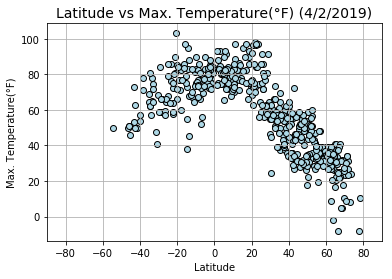

In [14]:
# Latitude Graph
plt.scatter(WeatherDf["Lat"], WeatherDf["Max Temp"], marker="o", facecolors="LightBlue", edgecolors="black")
plotprops("Latitude","Max. Temperature(°F)",[-90,90])
plt.savefig("LatitudVsTemperature.png")
plt.show()

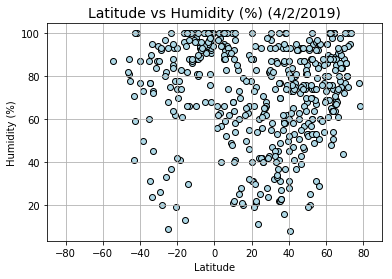

In [15]:
# Humidity Graph
plt.scatter(WeatherDf["Lat"], WeatherDf["Humidity"], marker="o", facecolors="LightBlue", edgecolors="black")
plotprops("Latitude","Humidity (%)",[-90,90])
plt.savefig("LatitudVsHumidity.png")
plt.show()

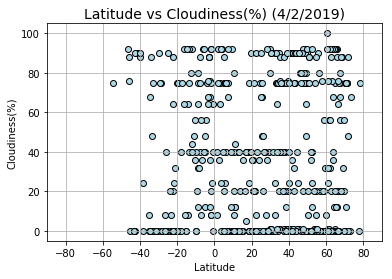

In [16]:
# Cloudiness Graph
plt.scatter(WeatherDf["Lat"], WeatherDf["Cloudiness"], marker="o", facecolors="LightBlue", edgecolors="black")
plotprops("Latitude","Cloudiness(%)",[-90,90])
plt.savefig("LatitudevsCloudiness.png")
plt.show()

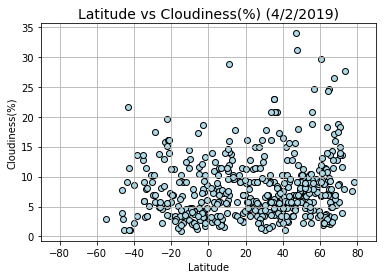

In [17]:
# Wind speed Graph
plt.scatter(WeatherDf["Lat"], WeatherDf["Wind Speed"], marker="o", facecolors="LightBlue", edgecolors="black")
plotprops("Latitude","Cloudiness(%)",[-90,90])
plt.savefig("LatitudevsWind.png")
plt.show()